# Spam Detection

Whenever you submit details about your email or contact number on any platform, it has become easy for those platforms to market their products by advertising them by sending emails or by sending messages directly to your contact number. This results in lots of spam alerts and notifications in your inbox. This is where the task of spam detection comes in.

Spam detection means detecting spam messages or emails by understanding text content so that you can only receive notifications about messages or emails that are very important to you. If spam messages are found, they are automatically transferred to a spam folder and you are never notified of such alerts. This helps to improve the user experience, as many spam alerts can bother many users.

Dataset :- https://www.kaggle.com/c/email-spam

In [ ]:
#importing libraries 
import pandas as pd #for data analysis
import numpy as np #2 perform mathematical operations on arrays
import seaborn as sns #statistical graphics

from sklearn.feature_extraction.text import CountVectorizer #breaking down a sentence/paragraph/any text in2 words
from sklearn.model_selection import train_test_split #used 2 separate data as training & testing data
from sklearn.naive_bayes import MultinomialNB #counts words in text
from sklearn.metrics import accuracy_score #2 check how accurate the model works
from sklearn.model_selection import cross_val_score #statistical method used to estimate the performance (or accuracy) of machine learning models

In [ ]:
#load the dataset 2 pandas data frame for manupulating the data
raw_data = pd.read_csv('spamham.csv', encoding = 'latin-1')

#now v hv 2 replace null values with null string otherwise it will show errors
#v will store this in variable claaed "mail_data"
mail_data = raw_data.where((pd.notnull(raw_data)), '')

In [ ]:
#lets check the shape of the dataset
mail_data.shape

(5572, 5)

In [ ]:
#lets c sample of this dataset in pandas data frame
#first 10 rows of the dataset
mail_data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,
5,spam,FreeMsg Hey there darling it's been 3 week's n...,,,
6,ham,Even my brother is not like to speak with me. ...,,,
7,ham,As per your request 'Melle Melle (Oru Minnamin...,,,
8,spam,WINNER!! As a valued network customer you have...,,,
9,spam,Had your mobile 11 months or more? U R entitle...,,,


In [ ]:
#last 10 rows of the dataset
mail_data.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,,,
5563,ham,Ard 6 like dat lor.,,,
5564,ham,Why don't you wait 'til at least wednesday to ...,,,
5565,ham,Huh y lei...,,,
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,,,
5567,spam,This is the 2nd time we have tried 2 contact u...,,,
5568,ham,Will Ì_ b going to esplanade fr home?,,,
5569,ham,"Pity, * was in mood for that. So...any other s...",,,
5570,ham,The guy did some bitching but I acted like i'd...,,,
5571,ham,Rofl. Its true to its name,,,


In [ ]:
#data preprocessing 2 check whether if there r any empty values
#checking the number of missing values in each column
mail_data.isnull().sum()

v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

### Counterplot
Showing the total count of Spam & Ham mail in counterplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


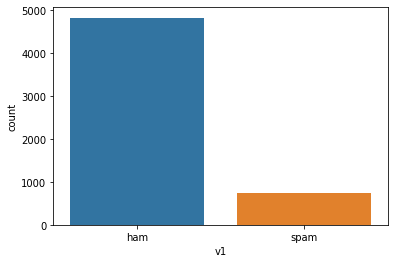

In [ ]:
#lets plot the data 
sns.countplot(mail_data['v1'])

#### Checking Number of Spam & Ham mail

In [ ]:
#here 'v1' is the dependent variable & remaining (v2 & unnamed 2, 3, 4) r independent variable
#lets check how many values r there in dependent variable 'v1'
#v can c how many examples r there for v1 spam & ham
pd.value_counts(mail_data['v1'])

ham     4825
spam     747
Name: v1, dtype: int64

From this dataset, V1 & V2 are the only features we need to train a machine learning model for spam detection, so let’s select these two columns as the new dataset:

In [ ]:
data = mail_data[["v1", "v2"]]

Now let’s split this dataset into training and test sets and train the model to detect spam messages:

In [ ]:
#now v need 2 separate te data as text & labels
x = np.array(data["v2"]) #x --> Text data
y = np.array(data["v1"]) #y --> Label data

print(x) #print text data
print("---------------------------------------------------------------------------")
print(y) #print label data

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
---------------------------------------------------------------------------
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [ ]:
#loading the CountVectorizer in2 the variable "cv"
cv = CountVectorizer()

#training the CountVectorizer wyt the text(v1) data
X = cv.fit_transform(x) 

## Dividing data into train and test data using sklearn's train_test_split()

Now let’s separate the dataset into training and testing sets, and then I’ll use the Multinomial Naive Bayes algorithm to train the fake news detection model:

In [ ]:
#now v need 2 split the dataset in2 training data & testing data
#train_size represents how how much % data u want for training samples
#test_size represents how much % data u want for testing 
#random_state splits the data in the specific way, u can put any variable u want
#if u want 2 split the data in the same way u did before v need 2 specify the same random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#lets c how many examples r there for each cases
#checking dimensions of text
print(X.shape, X_train.shape, X_test.shape)

(5572, 8672) (4457, 8672) (1115, 8672)


In [ ]:
#lets c how many examples r there for each cases
#checking dimensions of labels
print(y.shape, y_train.shape, y_test.shape)

(5572,) (4457,) (1115,)


## Our data is ready to be applied a machine learning algorithm

Training the model

In [ ]:
#training the model with training data
#data will b itterated around the hyperplane until gud plot is made
#training the MultinimialNB wyt the training data
#loading the MultinomialNB in2 the variable "model"
clf = MultinomialNB().fit(X_train, y_train)

## Predicting seen data with our ML model

In [ ]:
#prediction on train_data
X_train_prediction = clf.predict(X_train)
X_train_prediction

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

## Predicting unseen data with our ML model

In [ ]:
#prediction on test_data
X_test_prediction = clf.predict(X_test)
X_test_prediction

array(['spam', 'ham', 'spam', ..., 'ham', 'ham', 'spam'], dtype='<U4')

In [ ]:
#v r finding the accuracy_score on the training data 2 check how the model performs on traing data 
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

#v r finding the accuracy_score on the testing data 2 check how the model performs on testing data 
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
#print the accuracy_score on training data
print('Accuracy on Training data : ', training_data_accuracy)

#print the accuracy_score on testing data
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9943908458604442
Accuracy score on Test Data :  0.97847533632287


## ML model Score

In [ ]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the training data 
clf.score(X_train, y_train)

0.9943908458604442

In [ ]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the test data 
clf.score(X_test, y_test)

0.97847533632287

Lets Cross Validate and Check how the model performs.

In [ ]:
#cross validation
#it is used to protect against overfitting in a predictive model, 
#particularly in a case where the amount of data may be limited. In cross-validation, 
#you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.
#cv = 5 ==> partition the data in2 4 Training & 1 Testing Data parts
print(cross_val_score(clf, X, y, cv = 5))

[0.98295964 0.98206278 0.97935368 0.98114901 0.97845601]


Now let’s test this model by taking a user input as a message to detect whether it is spam or not

Predict on new mail

In [ ]:
sample = input('Enter a message: ')
sample_data = cv.transform([sample]).toarray()
print(clf.predict(sample_data))

Enter a message: You won Cash prize of $1000
['spam']


## Summary
So this is how you can train a machine learning model for the task of detecting whether an email or a message is spam or not. A Spam detector detects spam messages or emails by understanding text content so that you can only receive notifications about messages or emails that are very important to you. I hope you liked this project on the task of detecting spam alerts with machine learning using Python.

Saving the trained model

In [ ]:
import pickle #keeps track of the objects it has already serialized ==> allows saving model in very little tym

In [ ]:
#save the model trained in the file "trained_model.sav" to a new file called "spammail_trained_model.pkl"
filename = 'spammail_trained_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('spammail_trained_model.sav', 'rb'))

In [ ]:
sample = input('Enter a message: ')
sample_data = cv.transform([sample]).toarray()
print(clf.predict(sample_data))

Enter a message: You won Cash prize of $1000
['spam']
